<a href="https://colab.research.google.com/github/dereckduran/Personal-Projects/blob/Quantum_Computing/Quantum_Computing/qiskit_fundamentals_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Qiskit 2 Fundamentals Lab

Welcome to the Qiskit 2 Fundamentals Lab! This notebook is designed to help get up to speed on Qiskit 2 fundamentals by providing hands-on exercises for 18 core concepts.

**Instructions:**
1. Read the explanation for each concept.
2. Complete the coding exercise in the designated cell.
3. After attempting the exercise, you can check your answer in the _solutions notebook

## Setup

First, let's install and import the necessary libraries. Run the cell below.

In [1]:
!pip install qiskit[visualization] qiskit-ibm-runtime qiskit-aer qiskit_qasm3_import

import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Pauli, SparsePauliOp, Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_aer import AerSimulator
from qiskit.circuit import Parameter, ParameterVector
import qiskit.qasm3
from qiskit_ibm_runtime.fake_provider import FakeVigoV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler, EstimatorV2 as Estimator, QiskitRuntimeService


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 83.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 368.7/368.7 kB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.5/541.5 kB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 81.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 74.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 13.1 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=a3f9534ca55d27f623e12601583ad88e305494633ebcd25371bb1c396230f9f7
  Stored in

---

## 1. Pauli Operators (Single-Qubit Operators)

**Explanation:** The Pauli operators (X, Y, Z, and I) are 2x2 matrices that represent fundamental single-qubit quantum operations. In Qiskit, these can be created using the `Pauli` class (e.g., `Pauli('X')` for the X operator). You can also construct multi-qubit Paulis by specifying characters for each qubit (e.g., `'XI'` for identity on qubit 0 and X on qubit 1, following Qiskit's little-endian bit ordering).

**Exercise 1:**
Write code that performs following functionality:
1. Creates a 3-qubit Pauli operator representing `Z` on qubit 2, `Y` on qubit 1, and `I` (Identity) on qubit 0.
2. Prints the operator.
3. Prints its corresponding matrix representation

ZYI
[[0.+0.j 0.+0.j 0.-1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.-1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+1.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+1.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.-1.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.-1.j 0.+0.j 0.+0.j]]


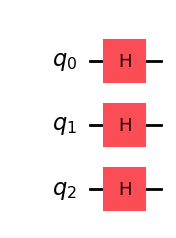

In [6]:
# Your code here
pauli_op = Pauli('ZYI')
print(pauli_op)
print(pauli_op.to_matrix())

qc = QuantumCircuit(3)
qc.h([0,1,2])
display(qc.draw("mpl"))

---

## 2. Single-Qubit Gates and Phases

**Explanation:** Single-qubit gates like X, Y, Z, H, S, and T are basic operations on one qubit. S and T are phase gates. The S-gate adds a π/2 phase to the |1⟩ component of any quantum state, while the T-gate adds a π/4 phase to the |1⟩ component, leaving the |0⟩ component unchanged in both cases. These phase shifts are crucial for many quantum algorithms.

**Exercise 2:**
Write code that performs following functionality:
1. Creates a quantum circuit that contains one qubit.
2. Puts the qubit in the state |1⟩.
3. Adds a single gate to the circuit that applies a π/4 phase shift to the qubit.
4. Output a Dirac notation representation of the circuit's statevector.

In [8]:
# Your code here
qc  = QuantumCircuit(1)
qc.x(0)
qc.t(0)


statevector = Statevector(qc)
statevector.draw('latex', prefix = 'Statevector = ')

<IPython.core.display.Latex object>

---

[link text](https://)## 3. Superposition and Bloch Sphere Rotations

**Explanation:** Gates like `RX`, `RY`, and `RZ` perform rotations around the axes of the Bloch sphere, creating superposition states. A rotation by an angle θ around the Y-axis (`RY(θ)`) on an initial state |0⟩ produces the superposition cos(θ/2)|0⟩ + sin(θ/2)|1⟩. The probabilities of measuring 0 or 1 are the squares of these amplitudes.

**Exercise 3:**
Write code that performs following functionality:
1. Creates a quantum circuit that contains one qubit.
2. Applies a single gate to qubit 0 (initially in state |0⟩) to create a superposition where the probability of measuring |0⟩ is approximately 14.6% and the probability of measuring |1⟩ is 85.4%.
3. Prints the probabilities.
4. Displays a Bloch sphere representation of the statevector.

Probabilities: {np.str_('0'): np.float64(0.1464466094067263), np.str_('1'): np.float64(0.8535533905932737)}


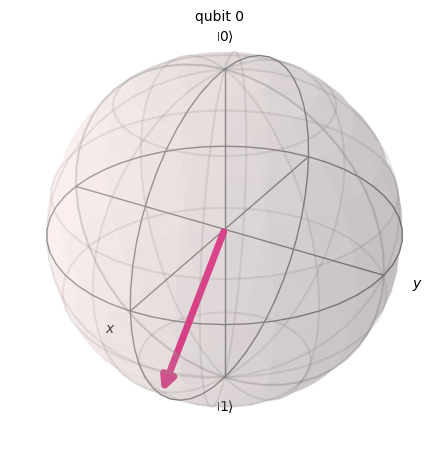

In [11]:
# Your code here

qc = QuantumCircuit(1)
#theta =. 3pi/4
qc.ry(3 * np.pi / 4, 0)
sv = Statevector(qc)

probs = sv.probabilities_dict()
print(f"Probabilities: {probs}")

plot_bloch_multivector(sv)

---

## 4. Multi-Qubit Operations and Entanglement

**Explanation:** Multi-qubit gates like the CNOT (`qc.cx(control, target)`) create entanglement when applied to superposition states. A common entangled state is the Bell state |Φ+⟩ = 1/√2(|00⟩ + |11⟩), created by applying a Hadamard gate to one qubit and then a CNOT gate. Remember Qiskit's bit ordering: qubit 0 is the rightmost bit (least significant).

**Exercise 4:**
Write code that performs following functionality:
1. Creates a quantum circuit that contains two qubits.
2. Create the Bell state |Φ+⟩ in which the first qubit (q0) is the control qubit.
3. Draws the quantum circuit using matplotlib.
4. Prints the circuit's statevector.

     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘


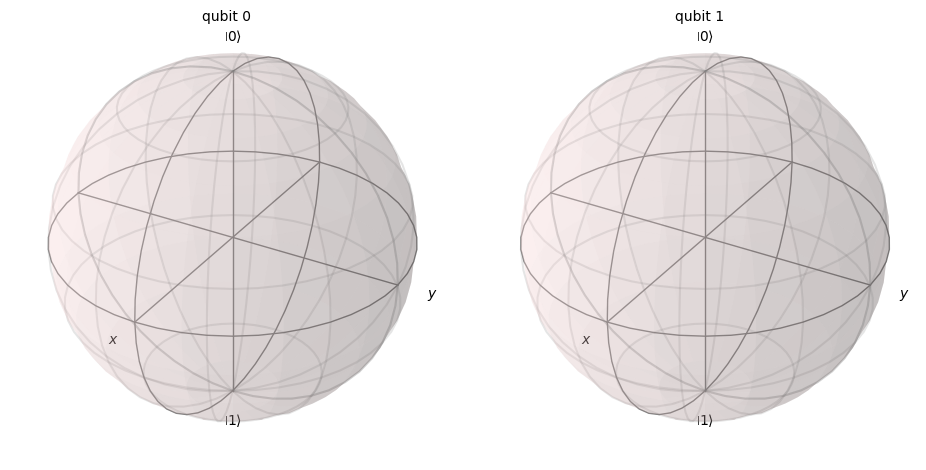

In [14]:
# Your code here
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
sv = Statevector(qc)
sv.draw('latex', prefix = 'Statevector = ')
print(qc.draw())
plot_bloch_multivector(sv)

---

## 5. Building Quantum Circuits and Drawing

**Explanation:** The `QuantumCircuit` class is used to build circuits. The `draw()` method provides visualizations in formats like `'text'`, `'mpl'`, and `'latex'`. You can customize the drawing with parameters such as `reverse_bits` to flip the qubit order.

**Exercise 5:**
Write code that performs following functionality:
1. Creates a 3-qubit GHZ state.
2. Draws the circuit with the qubit order reversed in the diagram (q2 on top, q0 on bottom).


In [ ]:
# Your code here



---

## 6. Dynamic Circuits and Classical Control Flow

**Explanation:** Qiskit supports dynamic circuits where operations can be conditioned on classical measurement outcomes. The `if_test()` context manager can be used to create conditional blocks where operations are executed based on classical bit values. This allows for powerful classical feed-forward in your quantum programs.

**Exercise 6:**
Write code that performs following functionality:
1. Creates a quantum circuit that contains two qubits and at least one classical bit.
2. Adds a hadamard gate to the least significant qubit
3. Applies an X gate to qubit 1 *only if* a measurement of qubit 0 yields the result `1`. Use the `if_test()` context manager with the appropriate condition tuple.
4. Draws the circuit using matplotlib.

In [ ]:
# Your code here
qc  = QuantumCircuit(2, 1)
qc.h(0)
qc.measure(0, 0)

with qc.if_test

---

## 7. Visualizing Quantum States and Results

**Explanation:** Qiskit offers several functions to visualize results. `plot_histogram(counts)` is used to display measurement outcomes from a simulation or real device run. You can sort the results for easier analysis, for example, by the frequency of the outcomes.

**Exercise 7:**
Write code that performs following functionality:
1. Creates a quantum circuit that contains the |Φ+⟩ Bell state.
2. Measures the results on classical wires.
3. Runs the circuit using the `AerSimulator`.
4. Gets the measurement counts.
5. Plots a histogram with the bars sorted from the most common outcome to the least common.

In [ ]:
# Your code here


---

## 8. Parameterized Quantum Circuits

**Explanation:** Qiskit allows circuits with symbolic parameters using the `Parameter` class. These parameters act as placeholders that can be bound to specific numerical values later using the `assign_parameters()` method. This is fundamental for variational algorithms like VQE and QAOA.

**Exercise 8:**
Write code that performs following functionality:
1. Creates a `Parameter` instance to represent a parameter named `theta`.
2. Creates a quantum circuit `qc` that contains one qubit.
3. Adds an RX gate with parameter `theta` to the qubit wire.
4. Draws the `qc` circuit.
5. Creates a new circuit `bound_qc` by binding the parameter `theta` to the value `π/2`.
6. Draws the `bound_qc` circuit.

In [ ]:
# Your code here


---

## 9. Circuit Transpilation and Optimization

**Explanation:** Transpilation adapts a quantum circuit to the constraints of a specific quantum device, including its basis gates and qubit connectivity. The `generate_preset_pass_manager()` function creates a transpilation pass manager with preset configurations. It has several `optimization_level` settings (0-3), where higher levels apply more advanced optimization techniques to reduce circuit depth and gate count, at the cost of longer compilation time.

**Exercise 9:**
Write code that performs following functionality:
1. Creates a 3-qubit GHZ circuit.
2. Transpiles the circuit for the `FakeVigoV2` backend, using the highest level of optimization (level 3).
3. Prints the depth of the original circuit.
4. Prints the depth of the transpiled circuit.
5. Draws the transpiled circuit.

In [ ]:
# Your code here


---

## 10. Qiskit Runtime Execution Modes

**Explanation:** Qiskit Runtime offers three execution modes: **job**, **session**, and **batch**. The execution modes determine how your jobs are scheduled, and choosing the right execution mode allows your workload to run efficiently within your budget.

**Exercise 10:** This is a conceptual question. In the markdown cell below, explain which execution mode (job, session, or batch) you would use for a Variational Quantum Eigensolver (VQE) algorithm and briefly state why.

*[Your answer here]*

---

## 11. Quantum Primitives (Sampler and Estimator)

**Explanation:** Primitives are high-level interfaces for common quantum tasks. The **Sampler** and **Estimator** are two key primitives that each serve different purposes when working with quantum circuits. They abstract away the details of execution and error mitigation, making it easier to extract meaningful information from quantum computations.

**Exercise 11:** This is a conceptual question. In the markdown cell below, describe the fundamental difference between the Sampler and Estimator primitives in a single sentence.

*[Your answer here]*

---

## 12. Using the Sampler Primitive

**Explanation:** In Qiskit 2, you can use the `Sampler` primitive from `qiskit_ibm_runtime` with local simulators like `AerSimulator`. Here you'll initialize a `Sampler` with a backend mode, transpile your circuit using `generate_preset_pass_manager`, then use the `.run([circuits], shots=...)` method. The result object contains measurement data accessible via the classical register names.

**Exercise 12:**
Write code that performs following functionality:
1. Creates a quantum circuit that contains the |Φ+⟩ Bell state.
2. Uses the `measure_all` method to measure the results.
3. Transpiles the circuit using the `AerSimulator` backend.
4. Initializes the `Sampler` primitive with the `AerSimulator` backend
5. Runs the Sampler.
6. Gets the measurement counts.
7. Prints the measurement counts.


In [ ]:
# Your code here


---

## 13. Using the Estimator Primitive

**Explanation:** In Qiskit 2, you can use the `Estimator` primitive from `qiskit_ibm_runtime` with local simulators like `AerSimulator`. The `Estimator` computes expectation values ⟨ψ|O|ψ⟩. Here you'll initialize an `Estimator` with a backend mode, transpile your circuit using `generate_preset_pass_manager`, apply the observable to the circuit layout, then use the `.run([(circuit, observable)])` method. The result object contains expectation values accessible via `data.evs`.

**Exercise 13:**
Write code that performs following functionality:
1. Creates a quantum circuit that contains the |Φ+⟩ Bell state.
2. Defines the ZZ observable using `SparsePauliOp`
3. Transpiles the circuit using the `AerSimulator` backend.
4. Applies the observable to the circuit layout
5. Initializes the `Estimator` primitive with the `AerSimulator` backend.
6. Runs the Estimator.
4. Gets the PUB result.
5. Retrieves and prints the expectation value.

In [ ]:
# Your code here


---

## 14. Error Mitigation Techniques

**Explanation:** Qiskit provides techniques to reduce the impact of noise on quantum hardware. **Readout error mitigation** corrects for errors in the final measurement step. **Dynamical Decoupling (DD)** inserts pulse sequences during idle times to protect qubits from decoherence. **Zero-Noise Extrapolation (ZNE)** runs circuits at different noise levels and extrapolates the result back to the zero-noise limit.

**Exercise 14:** This is a conceptual question. You are running a circuit on a noisy backend and suspect that the qubits are losing their quantum state (decohering) during idle periods in the circuit. Which error *suppression* technique would be most appropriate to apply?

*[Your answer here]*

---

## 15. OpenQASM 3 Basics

**Explanation:** OpenQASM 3 is the latest version of the quantum assembly language. It has a more expressive syntax than its predecessor. For example, you declare a register of three qubits with `qubit[3] my_qubits;` and a classical bit register with `bit[2] c;`.

**Exercise 15:** Complete the OpenQASM 3 string below to create a Bell state between `q[0]` and `q[1]`.

In [ ]:
qasm3_string = '''
OPENQASM 3.0;
include "stdgates.inc";
qubit[2] q;
bit[2] c;
// Your code here (2 lines)

c = measure q;
'''

print(qasm3_string)

---

## 16. OpenQASM 3 vs OpenQASM 2 – New Features

**Explanation:** OpenQASM 3 introduced significant improvements over OpenQASM 2, most notably expanding beyond simple gate-based circuits. A major enhancement involves programming constructs that allow quantum programs to make decisions and repeat operations based on classical data and measurement outcomes, enabling more dynamic and adaptive quantum algorithms.

**Exercise 16:** This is a conceptual question. What is a major feature related to classical logic that is present in OpenQASM 3 but completely absent in OpenQASM 2?

*[Your answer here]*

---

## 17. Interfacing OpenQASM with Qiskit

**Explanation:** Qiskit provides tools to convert between `QuantumCircuit` objects and OpenQASM 3 strings. To import an OpenQASM 3 string into a Qiskit circuit, you can use the `qiskit.qasm3.loads()` function.

**Exercise 17:** Using the OpenQASM 3 string you created in Exercise 15, write the Python code to:
1. Convert it into a Qiskit `QuantumCircuit` object named `qc_from_qasm`.
2. Draw the circuit

In [ ]:
qasm3_string_for_import = '''
OPENQASM 3.0;
include "stdgates.inc";
qubit[2] q;
bit[2] c;
h q[0];
cx q[0], q[1];
c = measure q;
'''

# Your code here


---

## 18. Qiskit IBM Runtime API

**Explanation:** Modern quantum applications often need to integrate quantum computations into broader software workflows. IBM Quantum provides cloud-based services that can be accessed programmatically from various programming environments beyond Python. Proper authentication credentials are required to access these services.

**Exercise 18:** This is a conceptual question. You are building a web application backend using Node.js, Go, or another non-Python language, and you need to submit quantum jobs to IBM's quantum computers. What approach would you use to access IBM's quantum computing services programmatically, and what is the most important piece of information you would need to authenticate your requests?

*[Your answer here]*

---

## 19. Running on real IBM Quantum hardware

**Explanation:** In a previous exercise, you used the `Sampler` primitive from `qiskit_ibm_runtime` with the `AerSimulator` local simulator. Here you'll run the `Sampler` primitive on a real IBM Quantum computer.

**Exercise 19:**
Edit the code below in the following way:
1. Comment out the following line:
```
backend = AerSimulator()
```
2. Add the following lines immediately after:
```
service = QiskitRuntimeService(name="fallfest-2025")
backend = service.least_busy(operational=True, simulator=False)
```


In [ ]:
# your_api_key = "deleteThisAndPasteYourAPIKeyHere"
# your_crn = "deleteThisAndPasteYourCRNHere"

# QiskitRuntimeService.save_account(
#     channel="ibm_quantum_platform",
#     token=your_api_key,
#     instance=your_crn,
#     name="fallfest-2025",
# )

# Check that the account has been saved properly
# service = QiskitRuntimeService(name="fallfest-2025")
# print(service.saved_accounts())

bell = QuantumCircuit(2)
bell.h(0)
bell.cx(0, 1)
bell.measure_all()

backend = AerSimulator()

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_bell = pm.run(bell)

sampler = Sampler(mode=backend)

job = sampler.run([isa_bell], shots=5000)
result = job.result()

counts = result[0].data.meas.get_counts()
print(f'Measurement counts: {counts}')